# Ejercicio: An√°lisis de Regresi√≥n con el Dataset Wine Quality

## Descripci√≥n del Dataset

El dataset **Wine Quality** contiene resultados de an√°lisis fisicoqu√≠micos de vinos portugueses "Vinho Verde" y su calidad evaluada por expertos. El objetivo es predecir la calidad del vino bas√°ndose en sus propiedades qu√≠micas.

### Variables del dataset:
- **fixed acidity**: Acidez fija (g/L de √°cido tart√°rico)
- **volatile acidity**: Acidez vol√°til (g/L de √°cido ac√©tico)
- **citric acid**: √Åcido c√≠trico (g/L)
- **residual sugar**: Az√∫car residual (g/L)
- **chlorides**: Cloruros (g/L de cloruro de sodio)
- **free sulfur dioxide**: Di√≥xido de azufre libre (mg/L)
- **total sulfur dioxide**: Di√≥xido de azufre total (mg/L)
- **density**: Densidad (g/cm¬≥)
- **pH**: pH del vino
- **sulphates**: Sulfatos (g/L de sulfato de potasio)
- **alcohol**: Contenido de alcohol (% vol)
- **quality**: Calidad del vino (puntuaci√≥n de 0-10) - **Variable objetivo**

En este ejercicio, trabajar√°s con el dataset de vinos tintos y aplicar√°s diferentes t√©cnicas de regresi√≥n para predecir la calidad del vino.

## 1. Importar librer√≠as y cargar datos

In [1]:
# Importar las librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Configurar estilo de gr√°ficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [2]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. An√°lisis Exploratorio de Datos (EDA)

### Ejercicio 2.1: Exploraci√≥n inicial
Completa el an√°lisis exploratorio inicial del dataset.

In [3]:
# Mostrar las primeras filas del dataset
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
# TODO: Muestra la informaci√≥n general del dataset (tipos de datos, valores no nulos)
# Tu c√≥digo aqu√≠
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# TODO: Calcula y muestra las estad√≠sticas descriptivas del dataset
# Tu c√≥digo aqu√≠
wine_data.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

In [6]:
# TODO: Verifica si hay valores nulos en el dataset
# Tu c√≥digo aqu√≠
print("Valores nulos por columna:")
print(wine_data.isnull().sum())

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Ejercicio 2.2: An√°lisis de la variable objetivo

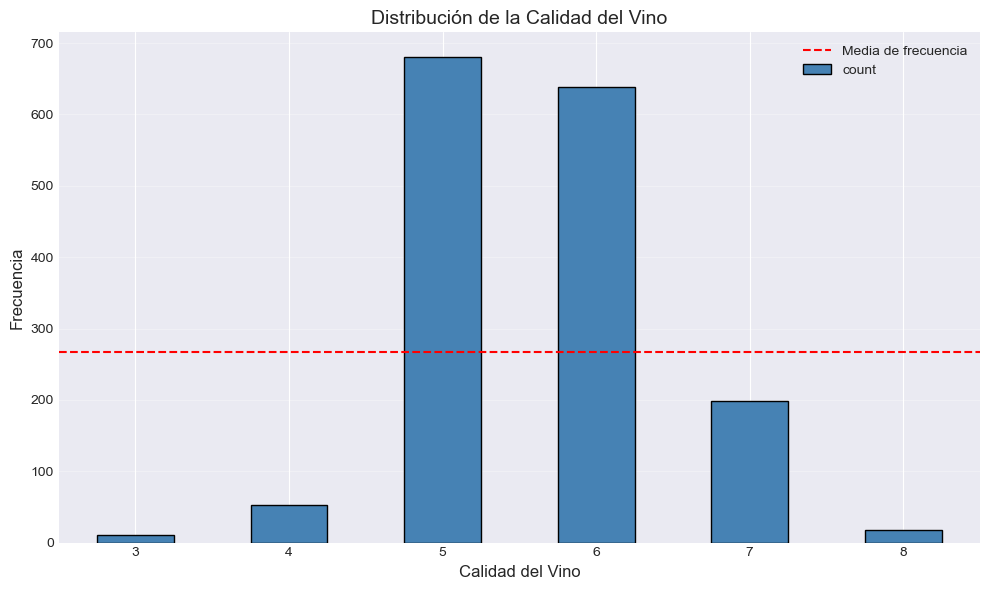

Estad√≠sticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviaci√≥n est√°ndar: 0.81


In [7]:
# Analizar la distribuci√≥n de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribuci√≥n de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estad√≠sticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estad√≠sticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviaci√≥n est√°ndar: {wine_data['quality'].std():.2f}")

### Ejercicio 2.3: Matriz de correlaci√≥n


Matriz de correlaci√≥n:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000            -0.256        0.672   
volatile acidity             -0.256             1.000       -0.552   
citric acid                   0.672            -0.552        1.000   
residual sugar                0.115             0.002        0.144   
chlorides                     0.094             0.061        0.204   
free sulfur dioxide          -0.154            -0.011       -0.061   
total sulfur dioxide         -0.113             0.076        0.036   
density                       0.668             0.022        0.365   
pH                           -0.683             0.235       -0.542   
sulphates                     0.183            -0.261        0.313   
alcohol                      -0.062            -0.202        0.110   
quality                       0.124            -0.391        0.226   

                      residual sugar  chlorides  free sulfur dio

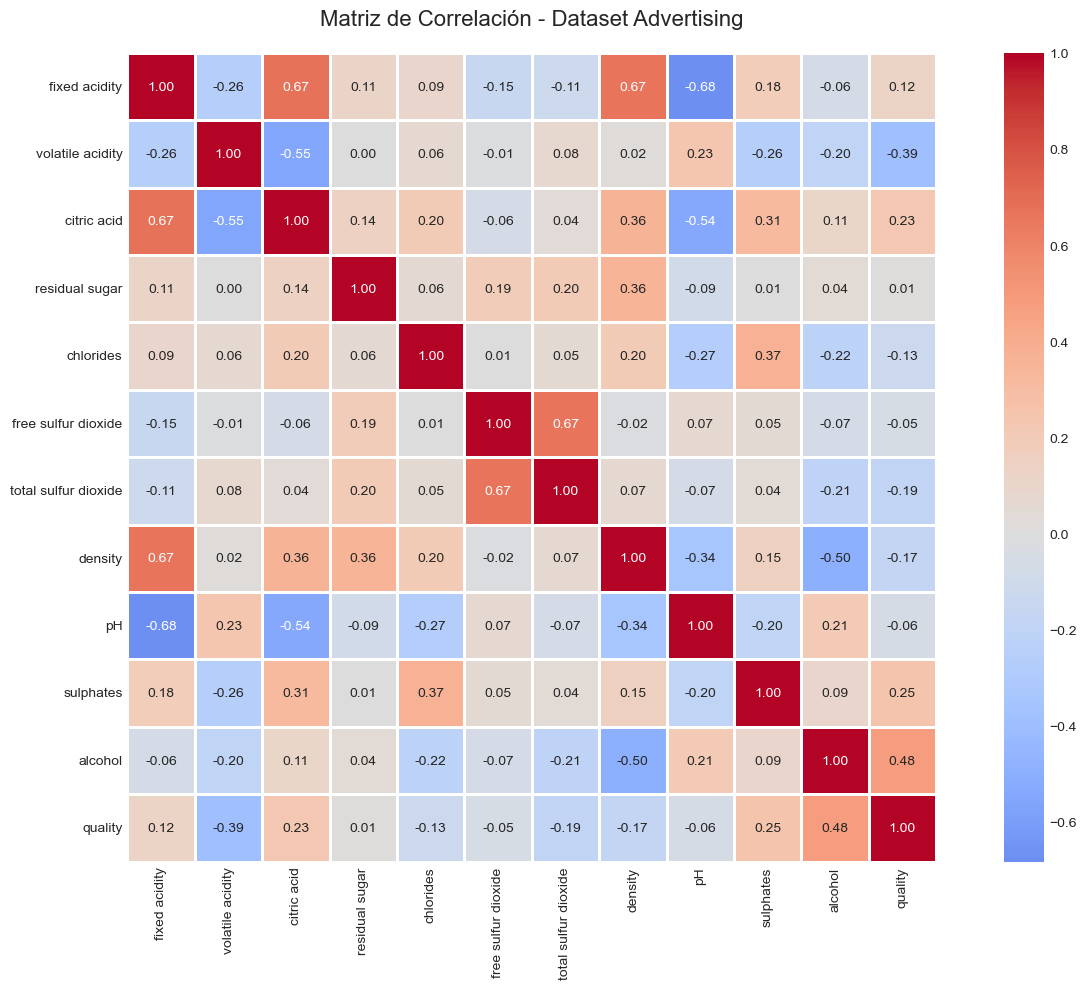

In [8]:
# TODO: Calcula la matriz de correlaci√≥n y visual√≠zala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
# Tu c√≥digo aqu√≠

# Matriz de correlaci√≥n
correlation_matrix = wine_data.corr()
print("\nMatriz de correlaci√≥n:")
print(correlation_matrix.round(3))
plt.figure(figsize=(14, 10))

# Completa el c√≥digo para crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlaci√≥n - Dataset Advertising', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [9]:
# TODO: Identifica y muestra las 5 variables m√°s correlacionadas con 'quality'
# Tu c√≥digo aqu√≠
correlaciones = correlation_matrix['quality'].drop(labels ='quality',axis = 0,inplace=False)
corrs = np.abs(correlaciones).nlargest(5).index
resultados = correlaciones.loc[corrs].sort_values(key=lambda x: x.abs(), ascending=False)
print("Las 5 variables m√°s correlacionadas con 'quality' son:")
print(resultados)

Las 5 variables m√°s correlacionadas con 'quality' son:
alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
Name: quality, dtype: float64


### Ejercicio 2.4: Visualizaci√≥n de relaciones

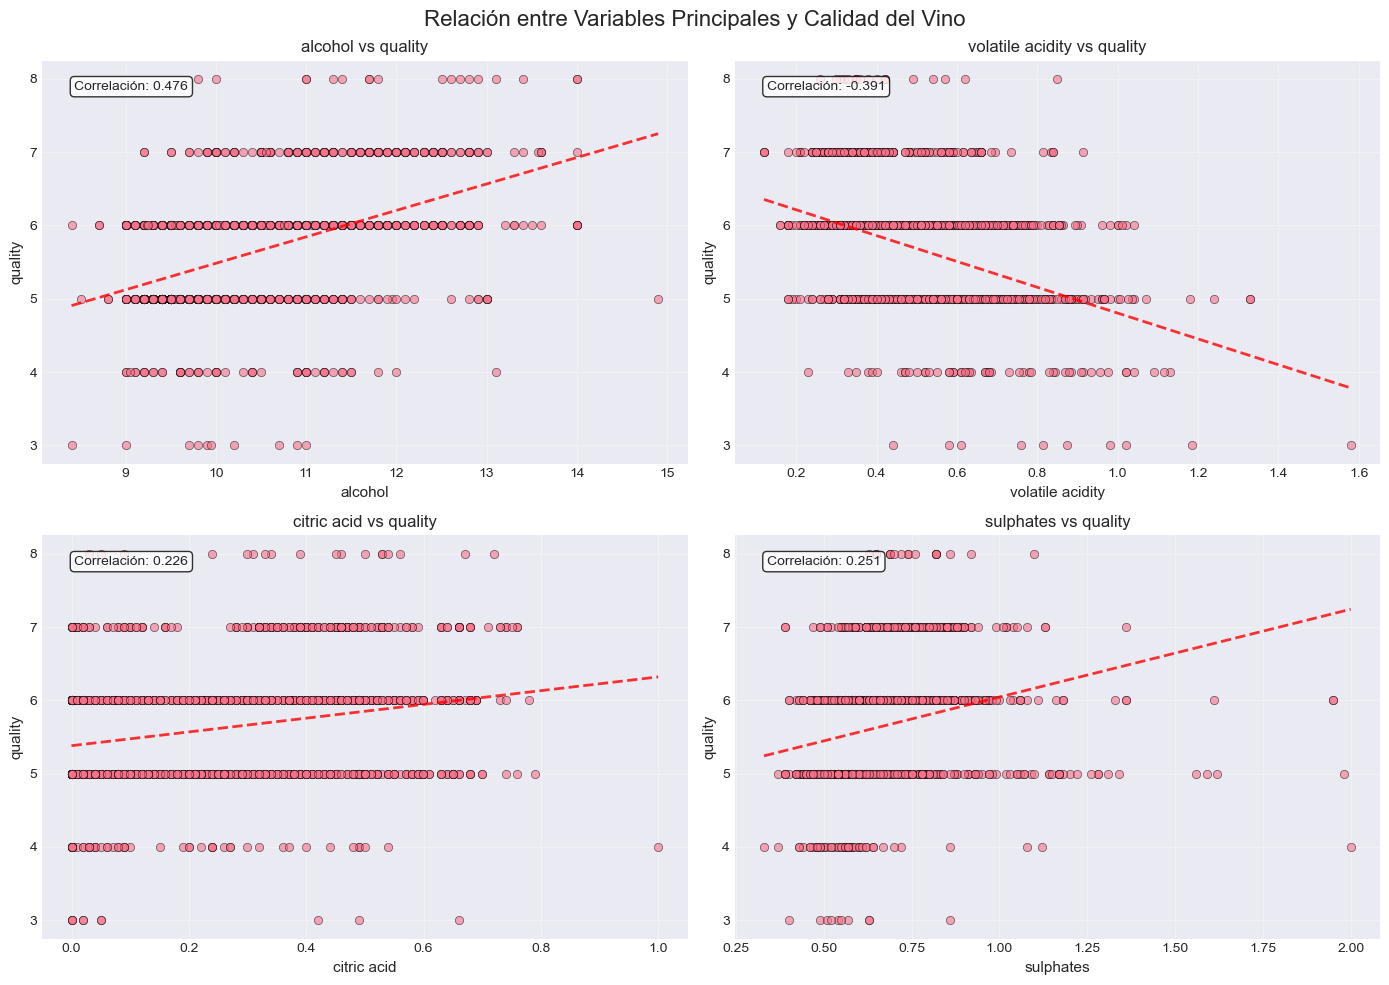

In [10]:
# Visualizar las 4 variables m√°s correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relaci√≥n entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # TODO: Crea un scatter plot para cada variable vs quality
    # Agrega una l√≠nea de tendencia
    # Tu c√≥digo aqu√≠
    ax.scatter(wine_data[feature], wine_data['quality'], alpha=0.6, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(f'{feature}', fontsize=11)
    ax.set_ylabel('quality', fontsize=11)
    ax.set_title(f'{feature} vs quality', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Agregar l√≠nea de tendencia
    z = np.polyfit(wine_data[feature], wine_data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(wine_data[feature].sort_values(), p(wine_data[feature].sort_values()), 
            "r--", alpha=0.8, linewidth=2)
    
    # Agregar correlaci√≥n
    corr = wine_data[[feature, 'quality']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Correlaci√≥n: {corr:.3f}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    pass

plt.tight_layout()
plt.show()

## 3. Preparaci√≥n de Datos

In [11]:
# Separar caracter√≠sticas (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracter√≠sticas: {X.columns.tolist()}")
print(X.head())

Forma de X: (1599, 11)
Forma de y: (1599,)

Caracter√≠sticas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3

In [12]:
# TODO: Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42
# Tu c√≥digo aqu√≠
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Divisi√≥n de datos completada:")
print(f"Tama√±o del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tama√±o del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

Divisi√≥n de datos completada:
Tama√±o del conjunto de entrenamiento: 1279 muestras (80.0%)
Tama√±o del conjunto de prueba: 320 muestras (20.0%)


In [13]:
# TODO: Estandariza las caracter√≠sticas
# Recuerda: ajusta el scaler solo con los datos de entrenamiento
# Tu c√≥digo aqu√≠
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos estandarizados para Ridge y Lasso")
print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviaci√≥n est√°ndar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")

Datos estandarizados para Ridge y Lasso
Media de X_train_scaled: [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.]
Desviaci√≥n est√°ndar de X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 4. Validaci√≥n Cruzada para Selecci√≥n de Hiperpar√°metros

La validaci√≥n cruzada es fundamental para seleccionar los mejores hiperpar√°metros sin usar el conjunto de prueba.

### Ejercicio 4.1: Implementaci√≥n manual de validaci√≥n cruzada

In [14]:
# Ejemplo: Validaci√≥n cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validaci√≥n cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validaci√≥n Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# TODO: Identifica el mejor alpha basado en el RMSE medio m√°s bajo
# Tu c√≥digo aqu√≠
results_df = pd.DataFrame(cv_results_manual)
best_idx = results_df['mean_rmse'].idxmin()
print("\nEl mejor alpha es:")
print(results_df.loc[best_idx])

Validaci√≥n Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)

El mejor alpha es:
alpha        100.000000
mean_rmse      0.659916
std_rmse       0.013947
Name: 5, dtype: float64


### Ejercicio 4.2: Usar RidgeCV para validaci√≥n cruzada autom√°tica

In [15]:
# TODO: Usa RidgeCV para encontrar autom√°ticamente el mejor alpha
# Pista: RidgeCV tiene un par√°metro 'alphas' y 'cv'
# Tu c√≥digo aqu√≠
alphas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_cv = RidgeCV(alphas=alphas, cv=cv5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_cv.alpha_
print(f"Mejor alpha encontrado por RidgeCV: {best_alpha_ridge:.6f}")

Mejor alpha encontrado por RidgeCV: 93.260335


### Ejercicio 4.3: GridSearchCV para b√∫squeda exhaustiva

In [16]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir par√°metros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# TODO: Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'
# Tu c√≥digo aqu√≠
grid_search_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True
)
grid_search_ridge.fit(X_train_scaled, y_train)

best_alpha_grid = grid_search_ridge.best_params_['alpha']
best_rmse_grid = np.sqrt(-grid_search_ridge.best_score_)
print(f"Mejor alpha (GridSearchCV): {best_alpha_grid:.6f}")
print(f"Mejor score (RMSE): {best_rmse_grid:.4f}")

Mejor alpha (GridSearchCV): 54.555948
Mejor score (RMSE): 0.6624


<Figure size 1000x600 with 0 Axes>

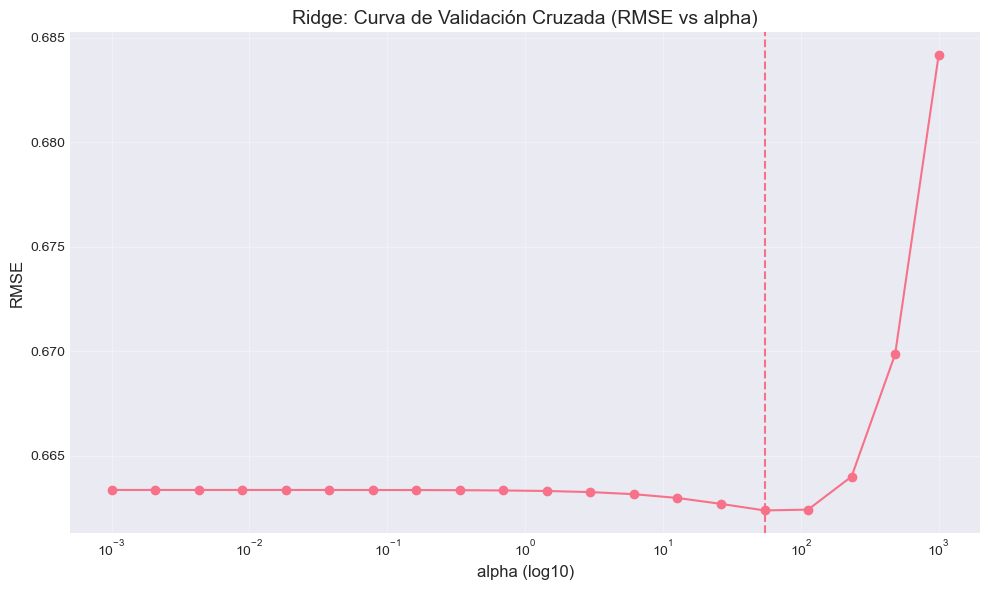

In [17]:
# TODO: Visualiza los resultados de la validaci√≥n cruzada
# Crea un gr√°fico que muestre c√≥mo cambia el RMSE con diferentes valores de alpha
# Tu c√≥digo aqu√≠
# === Visualizaci√≥n: RMSE vs alpha (de CV) ===

plt.figure(figsize=(10, 6))
# Completa el c√≥digo para visualizar los resultados
cv_results = grid_search_ridge.cv_results_
alphas_tried = cv_results['param_alpha'].data.astype(float)
mean_rmse = np.sqrt(-cv_results['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.semilogx(alphas_tried, mean_rmse, marker='o')
plt.axvline(best_alpha_grid, linestyle='--')
plt.xlabel('alpha (log10)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Ridge: Curva de Validaci√≥n Cruzada (RMSE vs alpha)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Modelos de Regresi√≥n

### 5.1 Regresi√≥n Lineal Normal

In [18]:
# TODO: Implementa y entrena un modelo de regresi√≥n lineal
# Tu c√≥digo aqu√≠
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# M√©tricas
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)

print("="*50)
print("REGRESI√ìN LINEAL NORMAL (OLS)")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {lr_model.intercept_:.6f}")
print(f"\nM√©tricas en Entrenamiento:")
print(f"  RMSE: {rmse_lr_train:.4f}")
print(f"  R¬≤: {r2_lr_train:.4f}")
print(f"  MAE: {mae_lr_train:.4f}")
print(f"\nM√©tricas en Prueba:")
print(f"  RMSE: {rmse_lr_test:.4f}")
print(f"  R¬≤: {r2_lr_test:.4f}")
print(f"  MAE: {mae_lr_test:.4f}")

REGRESI√ìN LINEAL NORMAL (OLS)

Coeficientes:
  fixed acidity: 0.039789
  volatile acidity: -0.179439
  citric acid: -0.027512
  residual sugar: 0.009421
  chlorides: -0.089084
  free sulfur dioxide: 0.058015
  total sulfur dioxide: -0.120008
  density: -0.019204
  pH: -0.060610
  sulphates: 0.146815
  alcohol: 0.296628

Intercepto: 5.623925

M√©tricas en Entrenamiento:
  RMSE: 0.6513
  R¬≤: 0.3480
  MAE: 0.4996

M√©tricas en Prueba:
  RMSE: 0.6245
  R¬≤: 0.4032
  MAE: 0.5035


### 5.2 Ridge Regression con mejor alpha de CV

In [19]:
# TODO: Entrena Ridge con el mejor alpha encontrado por validaci√≥n cruzada
# Tu c√≥digo aqu√≠
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)
    
y_pred_train = ridge_model.predict(X_train_scaled)
y_pred_test = ridge_model.predict(X_test_scaled)

# Predicciones y m√©tricas
mse_r_train = mean_squared_error(y_train, y_pred_train)
mse_r_test = mean_squared_error(y_test, y_pred_test)
rmse_r_train = np.sqrt(mse_r_train)
rmse_r_test = np.sqrt(mse_r_test)
r2_r_train = r2_score(y_train, y_pred_train)
r2_r_test = r2_score(y_test, y_pred_test)
mae_r_train = mean_absolute_error(y_train, y_pred_train)
mae_r_test = mean_absolute_error(y_test, y_pred_test)

print("="*50)
print("REGRESI√ìN RIDGE CON MEJOR ALPHA DE CV")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {ridge_model.intercept_:.6f}")
print(f"\nM√©tricas en Entrenamiento:")
print(f"  RMSE: {rmse_r_train:.4f}")
print(f"  R¬≤: {r2_r_train:.4f}")
print(f"  MAE: {mae_r_train:.4f}")
print(f"\nM√©tricas en Prueba:")
print(f"  RMSE: {rmse_r_test:.4f}")
print(f"  R¬≤: {r2_r_test:.4f}")
print(f"  MAE: {mae_r_test:.4f}")

REGRESI√ìN RIDGE CON MEJOR ALPHA DE CV

Coeficientes:
  fixed acidity: 0.053924
  volatile acidity: -0.165477
  citric acid: -0.005283
  residual sugar: 0.016327
  chlorides: -0.084597
  free sulfur dioxide: 0.045440
  total sulfur dioxide: -0.108913
  density: -0.046036
  pH: -0.039036
  sulphates: 0.140600
  alcohol: 0.263942

Intercepto: 5.623925

M√©tricas en Entrenamiento:
  RMSE: 0.6520
  R¬≤: 0.3466
  MAE: 0.5019

M√©tricas en Prueba:
  RMSE: 0.6265
  R¬≤: 0.3994
  MAE: 0.5067


### 5.3 Lasso Regression con validaci√≥n cruzada

In [20]:
# TODO: Implementa LassoCV para encontrar el mejor alpha autom√°ticamente
# Tu c√≥digo aqu√≠
alphas_lasso = np.logspace(-3, 1, 100) 
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.alpha_
coef_lasso = pd.Series(lasso_cv.coef_, index=X.columns)

y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test  = lasso_cv.predict(X_test_scaled)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test  = np.sqrt(mean_squared_error(y_test,  y_pred_lasso_test))
r2_lasso_train   = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test    = r2_score(y_test,  y_pred_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

print(f"Mejor alpha para Lasso: {best_alpha_lasso:.6f}")
print(f"N√∫mero de caracter√≠sticas seleccionadas: {(coef_lasso != 0).sum()}")

# Predicciones y m√©tricas
print("="*50)
print("REGRESI√ìN LASSO CON VALIDACI√ìN CRUZADA")
print("="*50)

print("\nCoeficientes (Lasso):")
for feature, coef in coef_lasso.items():
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto (Lasso): {lasso_cv.intercept_:.6f}")

print("\nM√©tricas en Entrenamiento (Lasso):")
print(f"  RMSE: {rmse_lasso_train:.4f}")
print(f"  R¬≤  : {r2_lasso_train:.4f}")
print(f"  MAE : {mae_lasso_train:.4f}")
print("\nM√©tricas en Prueba (Lasso):")
print(f"  RMSE: {rmse_lasso_test:.4f}")
print(f"  R¬≤  : {r2_lasso_test:.4f}")
print(f"  MAE : {mae_lasso_test:.4f}")

Mejor alpha para Lasso: 0.008498
N√∫mero de caracter√≠sticas seleccionadas: 8
REGRESI√ìN LASSO CON VALIDACI√ìN CRUZADA

Coeficientes (Lasso):
  fixed acidity: 0.009743
  volatile acidity: -0.171165
  citric acid: -0.000000
  residual sugar: 0.000000
  chlorides: -0.080162
  free sulfur dioxide: 0.035793
  total sulfur dioxide: -0.100195
  density: -0.000000
  pH: -0.051761
  sulphates: 0.133200
  alcohol: 0.298733

Intercepto (Lasso): 5.623925

M√©tricas en Entrenamiento (Lasso):
  RMSE: 0.6522
  R¬≤  : 0.3462
  MAE : 0.5015

M√©tricas en Prueba (Lasso):
  RMSE: 0.6266
  R¬≤  : 0.3991
  MAE : 0.5071


In [21]:
# TODO: Identifica qu√© caracter√≠sticas fueron eliminadas por Lasso
# Tu c√≥digo aqu√≠
print("Caracter√≠sticas eliminadas por Lasso:")
print(coef_lasso[coef_lasso == 0].index.tolist())

Caracter√≠sticas eliminadas por Lasso:
['citric acid', 'residual sugar', 'density']


## 6. Comparaci√≥n de Modelos

In [22]:
# TODO: Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R¬≤ Train, R¬≤ Test, MAE Test
# Tu c√≥digo aqu√≠
comparison_data = {
    'Modelo': ['Linear Regression', f'Ridge (Œ±={best_alpha_ridge})', f'Lasso (Œ±={best_alpha_lasso})'],
    'RMSE Train': [rmse_lr_train, rmse_r_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_r_test, rmse_lasso_test],
    'R¬≤ Train': [r2_lr_train, r2_r_train, r2_lasso_train],
    'R¬≤ Test': [r2_lr_test, r2_r_test, r2_lasso_test],
    'MAE Test': [mae_lr_test, mae_r_test, mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*70)
print("COMPARACI√ìN DE MODELOS")
print("="*70)
print(comparison_df.to_string(index=False))

# Identificar el mejor modelo
best_model_idx = comparison_df['RMSE Test'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Modelo']
print(f"\nüèÜ Mejor modelo basado en RMSE de prueba: {best_model_name}")


COMPARACI√ìN DE MODELOS
                        Modelo  RMSE Train  RMSE Test  R¬≤ Train  R¬≤ Test  MAE Test
             Linear Regression    0.651300   0.624520  0.347993 0.403180  0.503530
   Ridge (Œ±=93.26033468832199)    0.652017   0.626472  0.346556 0.399443  0.506719
Lasso (Œ±=0.008497534359086447)    0.652170   0.626642  0.346250 0.399117  0.507139

üèÜ Mejor modelo basado en RMSE de prueba: Linear Regression


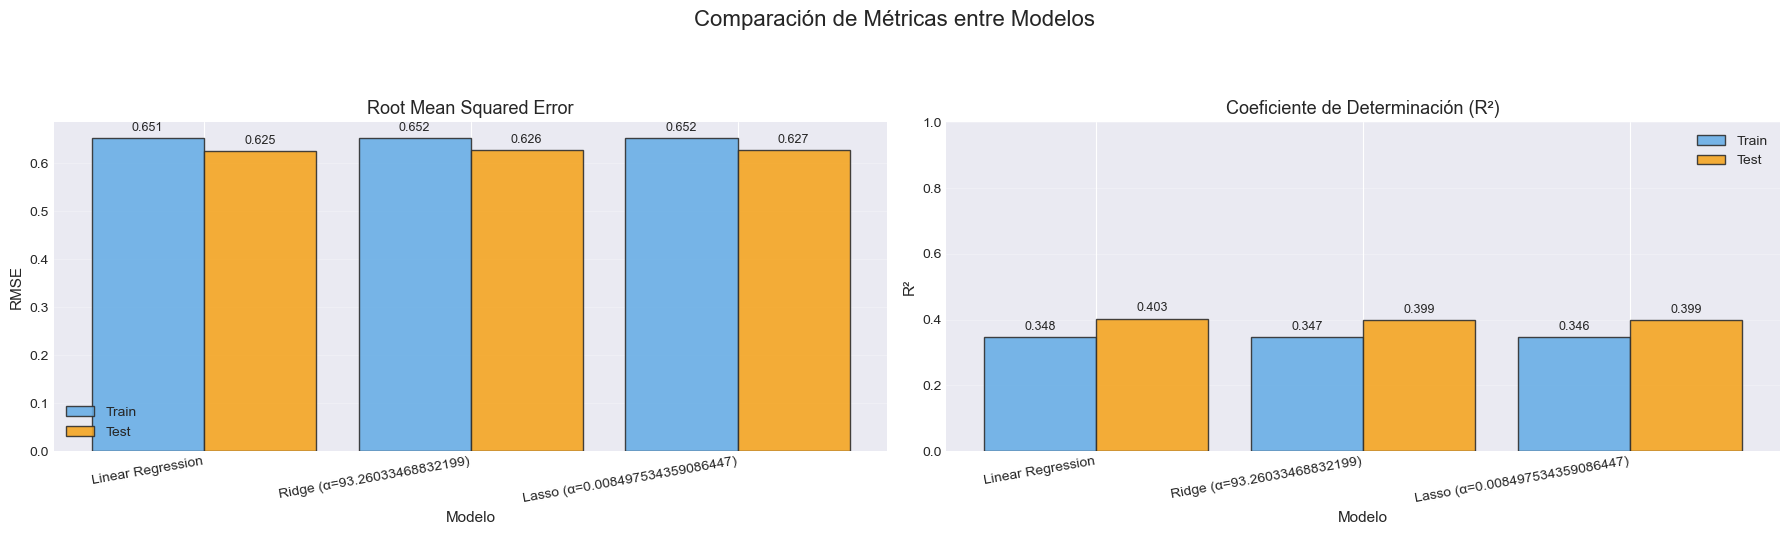

In [23]:
# TODO: Crea visualizaciones para comparar los modelos
# 1. Gr√°fico de barras comparando RMSE
# 2. Gr√°fico de barras comparando R¬≤
# Tu c√≥digo aqu√≠
# ===== Gr√°ficas comparativas (formato mejorado, misma l√≥gica) =====
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Comparaci√≥n de M√©tricas entre Modelos', fontsize=16, y=1.06)

models = comparison_df['Modelo'].tolist()
x_pos = np.arange(len(models))
width = 0.42

# Paleta y estilo
train_color = '#6AAFE6'   # azul suave
test_color  = '#F5A623'   # naranja suave
edge_color  = '#2F2F2F'

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# ---------- RMSE ----------
ax1 = axes[0]
bars1 = ax1.bar(x_pos - width/2, comparison_df['RMSE Train'], width,
                label='Train', color=train_color, edgecolor=edge_color, alpha=0.9)
bars2 = ax1.bar(x_pos + width/2, comparison_df['RMSE Test'],  width,
                label='Test',  color=test_color,  edgecolor=edge_color, alpha=0.9)
ax1.set_xlabel('Modelo', fontsize=11)
ax1.set_ylabel('RMSE', fontsize=11)
ax1.set_title('Root Mean Squared Error', fontsize=13)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=10, ha='right')
ax1.legend(frameon=False)
ax1.grid(True, alpha=0.25, axis='y')

# Etiquetas num√©ricas encima de barras
for bars in (bars1, bars2):
    for b in bars:
        ax1.annotate(f'{b.get_height():.3f}',
                     xy=(b.get_x() + b.get_width()/2, b.get_height()),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', fontsize=9)

# ---------- R¬≤ ----------
ax2 = axes[1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['R¬≤ Train'], width,
                label='Train', color=train_color, edgecolor=edge_color, alpha=0.9)
bars4 = ax2.bar(x_pos + width/2, comparison_df['R¬≤ Test'],  width,
                label='Test',  color=test_color,  edgecolor=edge_color, alpha=0.9)
ax2.set_xlabel('Modelo', fontsize=11)
ax2.set_ylabel('R¬≤', fontsize=11)
ax2.set_title('Coeficiente de Determinaci√≥n (R¬≤)', fontsize=13)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=10, ha='right')
ax2.legend(frameon=False)
ax2.grid(True, alpha=0.25, axis='y')
ax2.set_ylim([0, 1])

for bars in (bars3, bars4):
    for b in bars:
        ax2.annotate(f'{b.get_height():.3f}',
                     xy=(b.get_x() + b.get_width()/2, b.get_height()),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', fontsize=9)


plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


## 7. An√°lisis de Residuos

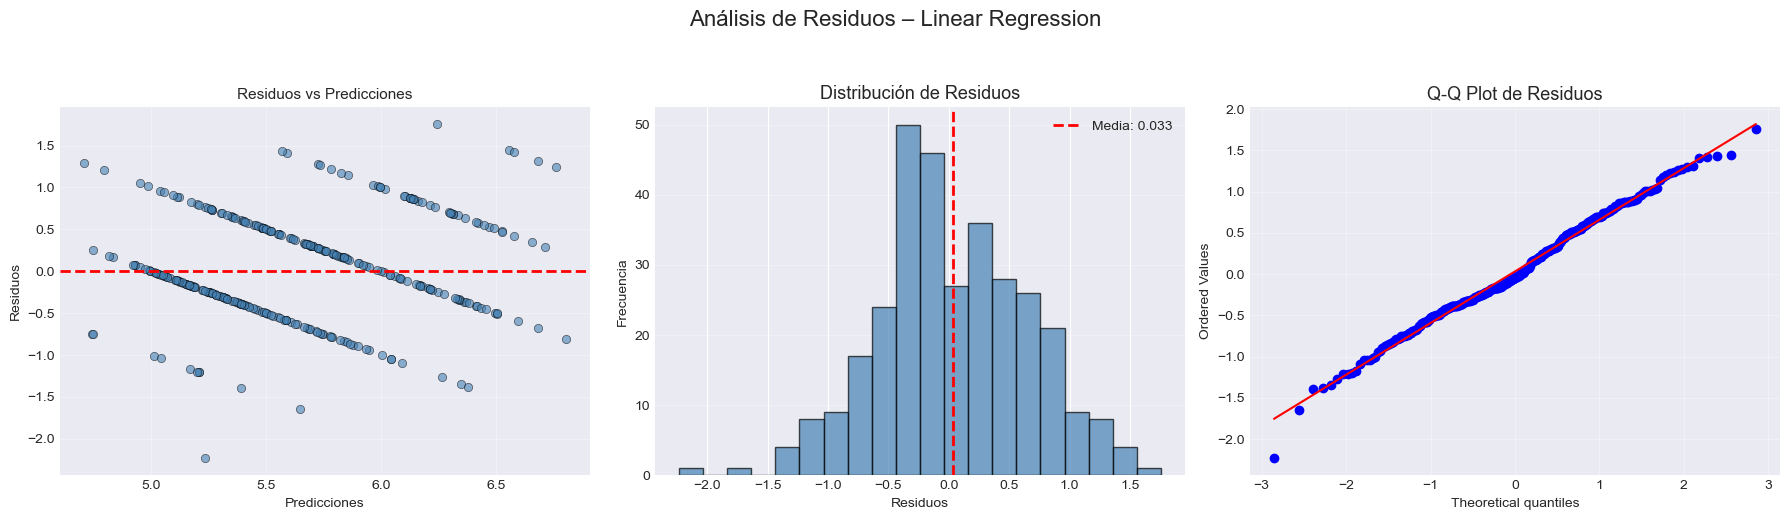

In [24]:
# TODO: Para el mejor modelo, crea:
# 1. Gr√°fico de residuos vs predicciones
# 2. Histograma de residuos
# 3. Q-Q plot de residuos
# Tu c√≥digo aqu√≠
# === 7. An√°lisis de Residuos (solo Linear Regression) ===
residuals_lr = y_test - y_pred_lr_test

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('An√°lisis de Residuos ‚Äì Linear Regression', fontsize=16, y=1.03)

color = 'steelblue'

# 1) Residuos vs Predicciones
ax1 = axes[0]
ax1.scatter(y_pred_lr_test, residuals_lr, alpha=0.6, color=color, edgecolors='black', linewidth=0.5)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicciones', fontsize=10)
ax1.set_ylabel('Residuos', fontsize=10)
ax1.set_title('Residuos vs Predicciones', fontsize=11)
ax1.grid(True, alpha=0.3)

# 2) Histograma de Residuos
ax2 = axes[1]
ax2.hist(residuals_lr, bins=20, edgecolor='black', alpha=0.7, color=color)
ax2.set_xlabel('Residuos', fontsize=10)
ax2.set_ylabel('Frecuencia', fontsize=10)
ax2.set_title('Distribuci√≥n de Residuos', fontsize=13)
ax2.grid(True, alpha=0.3, axis='y')
mean_resid = residuals_lr.mean()
ax2.axvline(mean_resid, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_resid:.3f}')
ax2.legend(frameon=False)

# 3) Q-Q Plot de Residuos
ax3 = axes[2]
stats.probplot(residuals_lr, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot de Residuos', fontsize=13)
ax3.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## 8. Importancia de Caracter√≠sticas

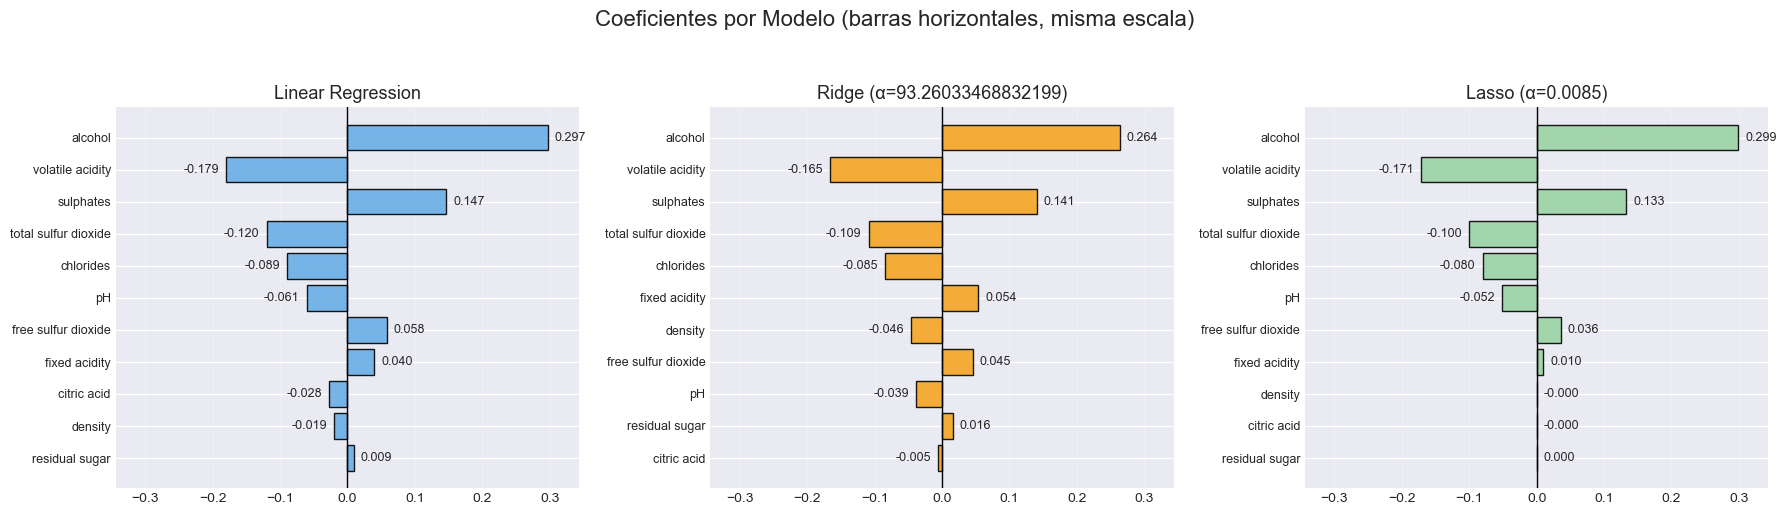

In [25]:
# TODO: Visualiza los coeficientes de los tres modelos en un mismo gr√°fico
# Esto te ayudar√° a entender qu√© caracter√≠sticas son m√°s importantes
# Tu c√≥digo aqu√≠
coef_lr    = pd.Series(lr_model.coef_,    index=X.columns, name='Linear')
coef_ridge = pd.Series(ridge_model.coef_, index=X.columns, name='Ridge')
coef_lasso = pd.Series(lasso_cv.coef_,    index=X.columns, name='Lasso')

def prep_df(series):
    df = series.to_frame('coef').copy()
    df['abs'] = df['coef'].abs()
    df = df.sort_values('abs', ascending=True)
    return df

df_lr    = prep_df(coef_lr)
df_ridge = prep_df(coef_ridge)
df_lasso = prep_df(coef_lasso)

xmax = np.max([
    df_lr['abs'].max(),
    df_ridge['abs'].max(),
    df_lasso['abs'].max()
]) * 1.15 

fig, axes = plt.subplots(1, 3, figsize=(18, max(5, 0.45*len(X.columns))))
fig.suptitle('Coeficientes por Modelo (barras horizontales, misma escala)', fontsize=16, y=1.02)

def plot_model(ax, df, title, color='#6AAFE6'):
    ax.barh(df.index, df['coef'], color=color, edgecolor='black', alpha=0.9)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_title(title, fontsize=13)
    ax.set_xlim(-xmax, xmax)
    ax.grid(True, axis='x', alpha=0.25)
    for y, v in zip(df.index, df['coef']):
        ax.annotate(f'{v:.3f}',
                    xy=(v, y),
                    xytext=(5 if v >= 0 else -5, 0),
                    textcoords='offset points',
                    ha='left' if v >= 0 else 'right',
                    va='center', fontsize=9)

plot_model(axes[0], df_lr,    'Linear Regression',   color='#6AAFE6')
plot_model(axes[1], df_ridge, f'Ridge (Œ±={getattr(ridge_model, "alpha", "best")})', color='#F5A623')
plot_model(axes[2], df_lasso, f'Lasso (Œ±={lasso_cv.alpha_:.4f})',   color='#9CD3A5')

for ax in axes:
    ax.tick_params(axis='y', labelsize=9)
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## 9. Validaci√≥n Cruzada Final del Mejor Modelo

In [26]:
# TODO: Realiza validaci√≥n cruzada con 10 folds del mejor modelo
# Reporta la media y desviaci√≥n est√°ndar del RMSE
# Tu c√≥digo aqu√≠
# === 9. Validaci√≥n Cruzada Final del Mejor Modelo (Linear Regression) ===
def manual_cross_validation_linear(X, y, n_folds=10, random_state=42):
    """
    Validaci√≥n cruzada manual para Linear Regression con estandarizaci√≥n dentro de cada fold.
    Devuelve media, desviaci√≥n est√°ndar y el vector de RMSE por fold.
    """
    # Asegurar arrays para indexado por enteros
    X_np = X.values if hasattr(X, "values") else X
    y_ser = y if hasattr(y, "iloc") else pd.Series(y)

    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    rmse_scores = []

    for train_idx, val_idx in kf.split(X_np):
        # Split
        X_train_cv, X_val_cv = X_np[train_idx], X_np[val_idx]
        y_train_cv, y_val_cv = y_ser.iloc[train_idx], y_ser.iloc[val_idx]

        # Estandarizar SOLO con train del fold
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled   = scaler_cv.transform(X_val_cv)

        # Entrenar Linear Regression (fit_intercept=True por defecto)
        lr = LinearRegression()
        lr.fit(X_train_cv_scaled, y_train_cv)

        # Evaluar
        y_pred = lr.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        rmse_scores.append(rmse)

    rmse_scores = np.array(rmse_scores)
    return rmse_scores.mean(), rmse_scores.std(), rmse_scores

# Ejecutar CV manual (10 folds)
mean_rmse_lr, std_rmse_lr, rmse_folds_lr = manual_cross_validation_linear(X, y, n_folds=10)
print("Validaci√≥n Cruzada (Manual) - Linear Regression")
print(f"RMSE CV (10 folds)  -> media: {mean_rmse_lr:.4f} | std: {std_rmse_lr:.4f}")
print(f"RMSE por fold: {np.round(rmse_folds_lr, 4)}")

Validaci√≥n Cruzada (Manual) - Linear Regression
RMSE CV (10 folds)  -> media: 0.6509 | std: 0.0441
RMSE por fold: [0.6194 0.6296 0.6751 0.6771 0.6805 0.7068 0.6567 0.6932 0.5514 0.6189]


## 10. Conclusiones y Preguntas de Reflexi√≥n

### Preguntas para responder:

1. **¬øCu√°l modelo tuvo el mejor desempe√±o? ¬øPor qu√© crees que fue as√≠?**
   - Tu respuesta: El modelo de regresi√≥n lineal (OLS) obtuvo el menor RMSE y el mayor $R^2$ en el conjunto de prueba y tambi√©n tuvo el mejor desempe√±o en la validaci√≥n cruzada, aunque la diferencia entre los valores de esta y las regresiones Lasso y Ridge fue bastante baja. Creo que fue as√≠ porque la relaci√≥n entre las variables qu√≠micas y f√≠sicas del vino parecen tener una relaci√≥n relativamente simple con la calidad, por lo que esta se puede capturar razonablemente bien con un modelo lineal sin una penalizaci√≥n fuerte.

2. **¬øQu√© caracter√≠sticas son las m√°s importantes para predecir la calidad del vino?**
   - Tu respuesta: De acuerdo a la matriz de correlaciones y los coeficientes, las variables m√°s importantes fueron:
      - alcohol: indica que mayor contenido alcoh√≥lico se asocia con mayor calidad.
      - volatile acidity: acidez vol√°til alta se asocia con menor calidad, puede verse como un defecto.
      - sulphates: m√°s sulfatos sugieren una mayor calidad del vino al dar ciertas propiedades de sabor.

3. **¬øObservas se√±ales de sobreajuste en alg√∫n modelo? ¬øC√≥mo lo identificaste?**
   - Tu respuesta: No hay se√±ales claras de sobreajuste, ya que los valores de RMSE en los conjuntos de "train" y "test" son bastante similares para todos los modelos. Adem√°s, el gr√°fico de residuos para el modelo lineal muestra dispersi√≥n alrededor de cero, sin patrones o colas extremas que indiquen claramente un sobreajuste.

4. **¬øC√≥mo cambi√≥ el rendimiento de Ridge y Lasso con diferentes valores de alpha?**
   - Tu respuesta: En Ridge, la gr√°fica RMSE vs alpha mostr√≥ un m√≠nimo relativamente plano, y este mejor alpha casi iguala el valor de OLS, lo que indica que la regularizaci√≥n no era tan importante para estos datos.
   
   En Lasso, al incrementar alpha algunos coeficientes se reducen a cero, pero las variables que indican precisi√≥n tuvieron valores muy similares a las de Ridge y OLS, por lo que no hubo tanto beneficio en cuanto a precisi√≥n.

5. **¬øQu√© ventajas observaste al usar validaci√≥n cruzada para seleccionar hiperpar√°metros?**
   - Tu respuesta: 
      - Estimaci√≥n del error con menor varianza.
      - Evita usar el set de prueba para decidir par√°metros, lo preserva para la evaluaci√≥n final.
      - Facilita comparar par√°metros con criterios como RMSE o MAE m√≠nimo.

6. **Si Lasso elimin√≥ algunas caracter√≠sticas, ¬øcrees que esto mejor√≥ o empeor√≥ el modelo? ¬øPor qu√©?**
   - Tu respuesta: En este caso, los resultados del modelo Lasso no fueron mejores que los resultados originales obtenidos con la regresi√≥n lineal normal, por lo que podr√≠a decirse que dej√≥ el modelo igual o lo empeor√≥ ligeramente, ya que es posible que las variables eliminadas a√∫n explicaran cierta parte de la variaci√≥n del modelo. No obstante, Lasso pudo mejorar la simplicidad del modelo, ya que se deshizo de las variables menos relevantes.

7. **¬øQu√© otros pasos podr√≠as tomar para mejorar el rendimiento del modelo?**
   - Tu respuesta:
      - Incluir interacciones relevantes (ej., alcohol √ó pH).
      - Transformaciones lineales o no lineales.
      - Utilizar modelos no necesariamente lineales para pron√≥sticos.
      - An√°lisis y limpieza de datos para eliminar outliers o datos que afecten negativamente los resultados.

## Ejercicio Extra: Ingenier√≠a de Caracter√≠sticas

### Desaf√≠o:
Intenta mejorar el rendimiento del modelo creando nuevas caracter√≠sticas:

1. Crea interacciones entre variables (ej: alcohol √ó pH)
2. Crea caracter√≠sticas polinomiales
3. Agrupa la calidad en categor√≠as (baja: 3-4, media: 5-6, alta: 7-8) y √∫sala como caracter√≠stica
4. Crea ratios entre caracter√≠sticas relacionadas

In [27]:
# TODO: Implementa ingenier√≠a de caracter√≠sticas y eval√∫a si mejora el modelo
# Tu c√≥digo aqu√≠
